In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans

In [35]:
df = pd.read_csv("../proc_data/cstr.csv")
print(df.head())
y = df['class']
X = df.drop('class', axis=1)[['feature1', 'feature2']]

   Unnamed: 0   feature1   feature2  class
0           0  41.322630  10.776732    0.0
1           1  40.282010  12.140834    0.0
2           2  43.180370  11.824053    0.0
3           3  42.052227  15.140845    0.0
4           4  41.748140  16.027851    0.0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
np.unique(y_test, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([36, 45, 55, 39, 58, 43, 40, 40, 38, 44, 48, 35, 51]))

In [39]:
np.unique(y_train, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([184, 175, 165, 181, 162, 177, 180, 180, 182, 176, 172, 185, 169]))

### KNN 

In [40]:
kmeans = KMeans(n_clusters=13, random_state=42)
kmeans.fit(X_train)

/home/adithya/Dev/CL688 Project/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=13, random_state=42)

In [41]:
y_pred_train = kmeans.predict(X_train)
cluster_to_actual_class = {}
for cluster_label in range(13):
    cluster_indices = np.where(y_pred_train == cluster_label)
    y_train_array = y_train.to_numpy()
    cluster_labels = y_train_array[cluster_indices]
    cluster_labels = cluster_labels.astype(int)
    majority_class = np.bincount(cluster_labels).argmax()
    cluster_to_actual_class[cluster_label] = majority_class

print(cluster_to_actual_class)

{0: 8, 1: 9, 2: 7, 3: 2, 4: 5, 5: 6, 6: 0, 7: 3, 8: 10, 9: 1, 10: 8, 11: 4, 12: 11}


0.7097902097902098
0.6975944582741096


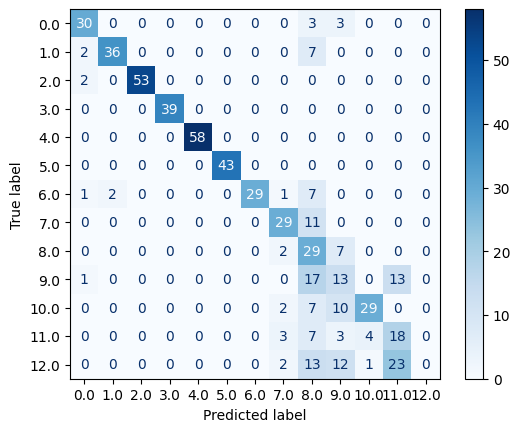

In [42]:
y_pred_test = kmeans.predict(X_test)
y_pred = np.array([cluster_to_actual_class[cluster_label] for cluster_label in y_pred_test])

from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Visualisation

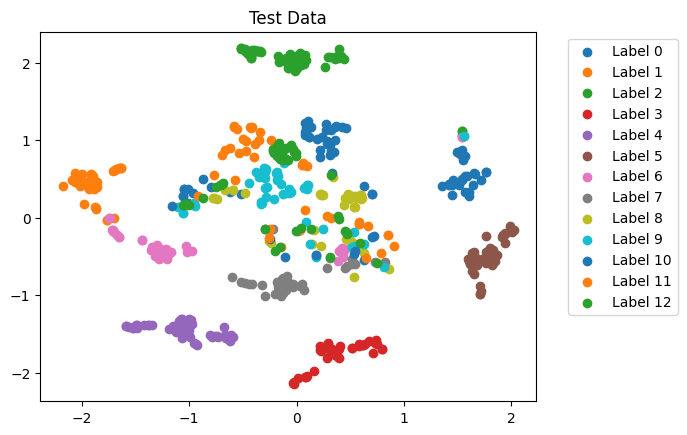

In [51]:
for i in range(13):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Label {i}')

plt.title('Test Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

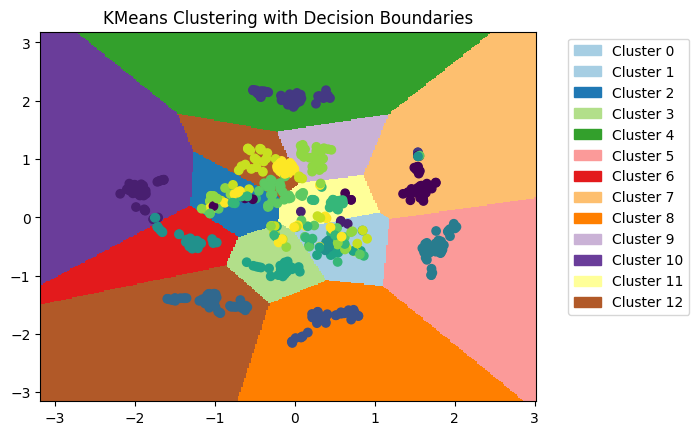

In [56]:
from matplotlib.patches import Patch
n_clusters = 13

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')

colors = [plt.cm.Paired(i/n_clusters) for i in range(n_clusters)]
patches = [Patch(color=colors[i], label=f'Cluster {i}') for i in range(n_clusters)]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')

plt.title('KMeans Clustering with Decision Boundaries')
plt.show()

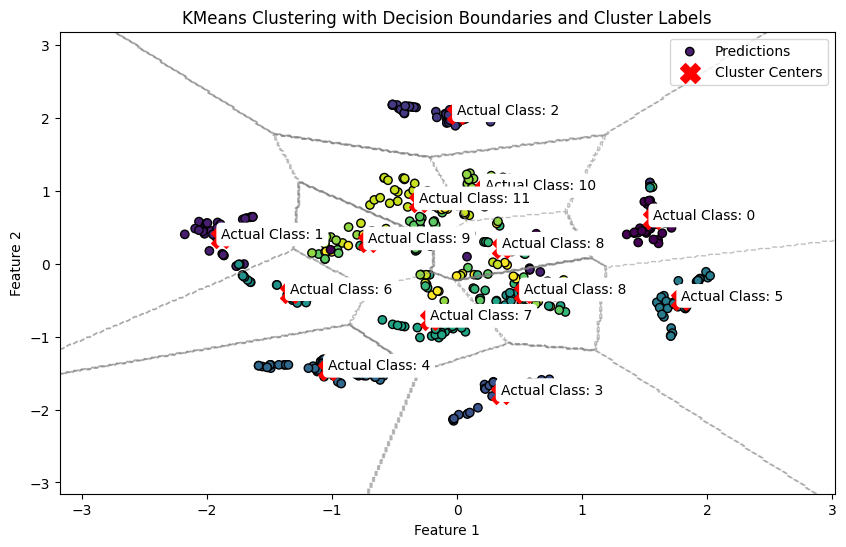

In [55]:
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', edgecolors='k', label='Predictions')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Plot decision boundaries
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='gray', linewidths=1, alpha=0.5, linestyles='dashed')

for cluster_label, actual_class in cluster_to_actual_class.items():
    center = kmeans.cluster_centers_[cluster_label]
    plt.text(center[0], center[1], f'Actual Class: {actual_class}', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))

plt.title('KMeans Clustering with Decision Boundaries and Cluster Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()